In [1]:
# disable FutureWarnings to have a cleaner output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# move to previouse directory to access the privugger code
import os, sys
sys.path.append(os.path.join("../../"))

# external libraries used in the notebook
import numpy as np
#import cm as a
#import matplotlib.pyplot as plt

# privugger library
import privugger as pv
import statistics

# external libraries used in the notebook
import numpy as np
#import arviz as az
import matplotlib.pyplot as plt




#def avg(ages,zipcode):
#    return (ages.sum()) / (ages.size)
    data = np.random.poisson(4,size=300)
data = np.append(data,[50]*1)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


(array([189., 109.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

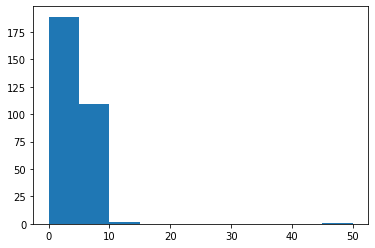

In [2]:
plt.hist(data)

In [3]:
#def avg2(a,*items):
#    l = []
#    for i in items:
#        l.append(i.sum() / (i.size)) 
#    return l
def avg(ages):
    return (ages.sum()) / (ages.size)

result = avg(data)
std = statistics.stdev(data)
result,std

(4.029900332225914, 3.3166247903554)

In [4]:
ages = pv.Normal('ages',mu=result,std=std,num_elements=len(data)) #how many elements?

ds = pv.Dataset(input_specs=[ages])

In [5]:
program = pv.Program('output1',
                     dataset=ds,
                     output_type=pv.Float,
                     function=avg)

#program.add_observation('output==' + str(result), precision=0.1)


trace   = pv.infer(program,
                   cores=4,
                   draws=300,
                   method='pymc3')


model = pv.infer(program,return_model=True) #what does this do?

Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [ages]
Could not pickle model, sampling singlethreaded.
Sequential sampling (2 chains in 1 job)
NUTS: [ages]


Sampling 2 chains for 1_000 tune and 300 draw iterations (2_000 + 600 draws total) took 4 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.


<function matplotlib.pyplot.show(close=None, block=None)>

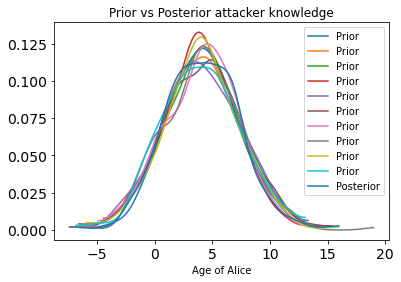

In [6]:
import pymc3 as pm
import arviz as az

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i,c in enumerate(colors):
    posterior_alice_age = trace.posterior['ages'][:,:,i].values.flatten()
    prior_alice_age = pm.sample_prior_predictive(model=model, samples=posterior_alice_age.size)['ages'][:,i]

    az.plot_dist(prior_alice_age,label='Prior',color=c)
az.plot_dist(posterior_alice_age,label='Posterior')
plt.title('Prior vs Posterior attacker knowledge')
plt.xlabel('Age of Alice')
plt.legend(loc='best')
plt.show

In [7]:
prior_alice_age = pm.sample_prior_predictive(model=model, samples=prior_alice_age.size)['ages'][:,i]

In [13]:
def get_metric(data,trace):
    
    metrics = []
    count = len(trace.posterior['ages'][:,:,0].values)
    for idx, i in enumerate(data):
        c = 0
        for item in trace.posterior['ages'][:,:,idx].values.flatten():
            if(item < i + 1 and item > i - 1):
                c += 1
        metrics.append(c/count)
    return metrics


def calc_kl_divergence(P,Q):
    return sum(rel_entr(P, Q))


def get_subset(metrics):
    metr = metrics
    subset = []
    
    
    total_dangerous = sum(metr)
    total_safe = len(metrics) - sum(metr)
    d_count = 0
    for idx, item in enumerate(metrics):
        if(item  == 1):
            subset.append((item,idx))
            d_count += 1
            if(d_count >= 5):
                break
    s_count = 0 
    for idx, item in enumerate(metrics):
        if(item  == 0):
            subset.append((item,idx))
            s_count += 1
            if(s_count >= 5):
                break
    return subset

def get_subset2(metrics):
    r = range(0,len(metrics))
    subset = sorted(zip(metrics, r))
    idx = list(zip(*list(zip(*subset[:5])))) + list(zip(*list(zip(*subset[-5:]))))
    
    return idx


0.0
300
2.5
285
8.0
199
17.5
283
23.5
151
80.0
201
4.029900332225914
80.0
234
4.029900332225914
82.0
11
4.029900332225914
82.5
294
4.029900332225914
85.5
276
4.029900332225914


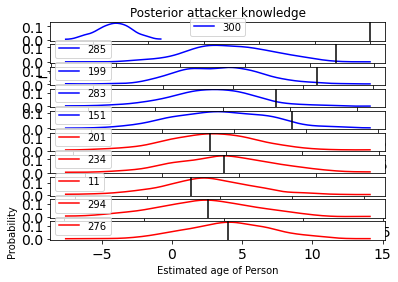

In [17]:
def get_plot2(data,trace):
    import pymc3 as pm
    import arviz as az
    
    metrics = get_metric(data,trace)
    subset = get_subset2(metrics)
    
    fig, axs = plt.subplots(10)
    for ax, item in zip(axs.flat, subset):
        metric,i = item[0],item[1]
        print(metric)
        print(i)
        if(metric >= 60):
            posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
            az.plot_dist(posterior_age,label=i,color='r', ax = ax)
            ax.axvline(x=data[i], c = 'black')
            print(result)
        else:
            posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
            az.plot_dist(posterior_age,label=i,color='b', ax = ax)
            ax.axvline(x=data[i], c = 'black')
    #posterior_alice_age = trace.posterior['ages'][:,:,0].values.flatten() #maybe should be average of all ages
    #az.plot_dist(posterior_alice_age,label='Posterior',color='green')
    #plt.axvline(x=result)
    axs[0].title.set_text('Posterior attacker knowledge')
    plt.xlabel('Estimated age of Person')
    plt.ylabel('Probability')
    plt.legend(loc='best')
    plt.show
        

get_plot2(data,trace)

NameError: name 'subset' is not defined

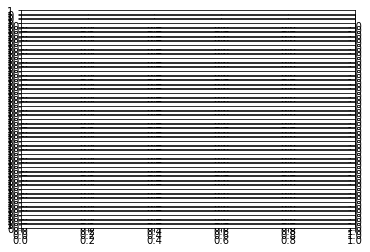

In [10]:
fig, axs = plt.subplots(50)
for ax, markevery in zip(axs.flat, subset):
    metric,i = subset[0],subset[1]
    if(metric == 1):
        posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
        az.plot_dist(posterior_age,label=i,color='r')
    else:
        posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
        az.plot_dist(posterior_age,label=i,color='b')

In [ ]:
def get_plot(data,trace):
    import pymc3 as pm
    import arviz as az
    
    metrics = get_metric(data,trace)
    subset = get_subset2(metrics)
    
    
    for metric,i in subset:
        if(metric == 1):
#            prior_age = pm.sample_prior_predictive(model=model, samples=20000)['ages'][:,i]

#            az.plot_dist(prior_age,label='Prior',color='r')
            posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
            az.plot_dist(posterior_age,label=i,color='r')
        else:
#            prior_age = pm.sample_prior_predictive(model=model, samples=20000)['ages'][:,i]

#            az.plot_dist(prior_age,label='Prior',color='b')
            posterior_age = trace.posterior['ages'][:,:,i].values.flatten() #maybe should be average of all ages
            az.plot_dist(posterior_age,label=i,color='b')
    
    posterior_alice_age = trace.posterior['ages'][:,:,0].values.flatten() #maybe should be average of all ages
    az.plot_dist(posterior_alice_age,label='Posterior',color='green')
    plt.axvline(x=result)
    plt.title('Prior vs Posterior attacker knowledge')
    plt.xlabel('Estimated age of Person')
    plt.ylabel('Probability')
    plt.legend(loc='best')
    plt.show
        

get_plot(data,trace)
    

In [ ]:
from scipy.stats import entropy


entropy([0.1,0.9,0.1], qk=[0.01,0.99,0.5])

In [ ]:
entropy([0.1,0.8,0.1], qk=[0.001,0.998,0.001])

In [ ]:
entropy([0.1,0.8,0.1], qk=[0.00001,0.8,0.19999])

In [ ]:
entropy([0.25,0.25,0.25,0.25], qk=[0.01,0.01,0.96,0.01])

In [ ]:
entropy([0.25,0.25,0.25,0.25], qk=[0.000001,0.249999,0.25,0.5])

Text(0.5, 0, 'Age')

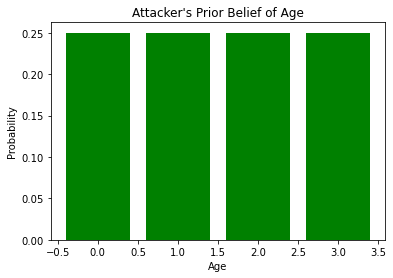

In [83]:
plt.bar([0,1,2,3],[0.25,0.25,0.25,0.25], color = 'green')
plt.title("Attacker's Prior Belief of Age")
plt.ylabel("Probability")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

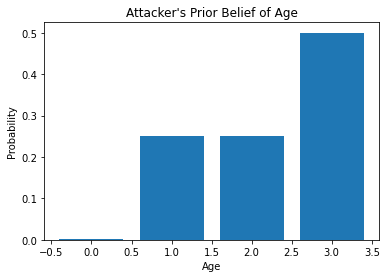

In [74]:
plt.bar([0,1,2,3],[0.001,0.249999,0.25,0.5])
plt.title("Attacker's Posterior Belief of Age: KL = 2.934")
plt.ylabel("Probability")
plt.xlabel("Age")

Text(0.5, 0, 'Age')

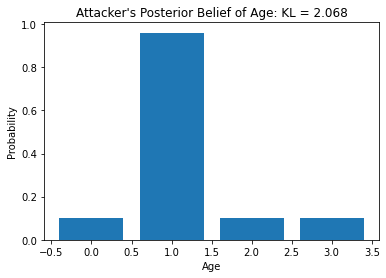

In [84]:
plt.bar([0,1,2,3],[0.1,0.96,0.1,0.1])
plt.title("Attacker's Posterior Belief of Age: KL = 2.068")
plt.ylabel("Probability")
plt.xlabel("Age")

In [88]:
posterior_alice_age.shape

(600,)

In [181]:
metrics = get_metric(data,trace)
metrics
subset = get_subset2(metrics)
subset


[(5.0, 56),
 (5.0, 78),
 (5.5, 31),
 (5.5, 71),
 (5.5, 73),
 (12.0, 72),
 (12.0, 74),
 (12.5, 46),
 (13.0, 34),
 (14.5, 88)]

In [179]:
len(data)

91

In [184]:
metrics

[11.5,
 7.0,
 8.5,
 12.0,
 8.5,
 9.0,
 8.5,
 8.5,
 7.0,
 8.5,
 7.5,
 8.5,
 8.5,
 7.0,
 7.0,
 9.5,
 9.5,
 6.0,
 7.5,
 9.5,
 9.5,
 9.0,
 10.0,
 8.5,
 8.0,
 10.5,
 8.0,
 6.5,
 9.0,
 11.0,
 5.5,
 11.0,
 8.5,
 13.0,
 10.0,
 8.0,
 10.5,
 10.5,
 6.0,
 10.0,
 9.5,
 9.0,
 6.0,
 9.5,
 9.5,
 12.5,
 7.5,
 12.0,
 9.0,
 9.0,
 11.5,
 8.0,
 6.5,
 12.0,
 9.0,
 5.0,
 7.0,
 8.5,
 9.5,
 8.0,
 9.0,
 6.5,
 8.0,
 7.5,
 7.0,
 8.0,
 11.0,
 7.0,
 10.5,
 9.0,
 5.5,
 12.0,
 5.5,
 12.0,
 8.0,
 9.5,
 11.5,
 5.0,
 9.0,
 9.0,
 10.5,
 8.5,
 8.0,
 11.0,
 8.0,
 9.5,
 9.5,
 14.5,
 8.5,
 6.0,
 4.0]

[(4.0, 6), (6.0, 5), (8.5, 4), (9.5, 1), (9.5, 2), (11.5, 0), (14.5, 3)]